## CSMODEL MP PHASE 1
__Group 5 Members:__
* Joshua Esleta
* John Liong
* Mark Musngi
* Justine Valdes




# Import Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
pd.set_option("display.max_rows", 200)

## DataFrame

Variables and Dictionaries are in the file "fies_2012_v1_metadata(dictionary)"

In [33]:
df = pd.read_csv("FIES PUF 2012 Vol.1.csv")
df

,W_REGN,W_OID,W_SHSN,W_HCN,URB,RSTR,PSU,BWEIGHT,RFACT,FSIZE,...,PC_QTY,OVEN_QTY,MOTOR_BANCA_QTY,MOTORCYCLE_QTY,POP_ADJ,PCINC,NATPC,NATDC,REGDC,REGPC
0,14,101001000,2,25,2,21100,415052,138.25,200.6576,3.0,...,01,01,,,0.946172,108417.00,9,8,8,9
1,14,101001000,3,43,2,21100,415052,138.25,200.6576,12.5,...,,01,,01,0.946172,30631.60,5,9,9,4
2,14,101001000,4,62,2,21100,415052,138.25,200.6576,2.0,...,,01,,,0.946172,86992.50,9,6,6,8
3,14,101001000,5,79,2,21100,415052,138.25,200.6576,4.0,...,,01,,,0.946172,43325.75,6,6,6,6
4,14,101001000,10,165,2,21100,415052,138.25,200.6576,5.0,...,,,,01,0.946172,37481.80,6,6,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40166,12,9804029001,18,568,1,22000,114062,271.25,963.2264,5.0,...,00,00,00,00,0.902863,30101.60,5,5,7,7
40167,12,9804035000,1,25,2,22000,414067,271.25,588.6253,9.0,...,00,01,00,00,0.902863,14368.89,1,5,7,3
40168,12,9804035000,2,51,2,22000,414067,271.25,588.6253,6.0,...,00,00,00,00,0.902863,19137.33,3,4,6,4
40169,12,9804035000,3,75,2,22000,414067,271.25,588.6253,5.0,...,00,01,00,00,0.902863,30985.00,5,6,7,7


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40171 entries, 0 to 40170
Columns: 119 entries, W_REGN to REGPC
dtypes: float64(5), int64(92), object(22)
memory usage: 36.5+ MB


# Dataset Description
## Family Income and Expenditure Survey 2012
 
### __Brief Description__
The 2012 Family Income and Expenditure Survey (FIES) adopted the 2009 Philippine Classification of Individual Consumption According to Purpose (PCOICOP). The 2009 PCOICOP is the first standard classification of individual consumption expenditure in the country prepared by the National Statistical Coordination Board (NSCB) in collaboration with concerned agencies in the Philippine Statistical System (PSS). The 2009 PCOICOP was patterned after the 1999 Classification of Individual Consumption According to Purpose (COICOP) issued by the United Nations Statistics Division (UNSD). The 2012 FIES is a sample survey designed to provide income and expenditure data for the country and its seventeen (17) regions. These data are the basic sources of information on human development and the basis of the policies and programs of the government to improve the socio-economic conditions of the Filipino people. 

### __Description of the Collection Process__

 The survey was conducted in two separate rounds using separate questionnaires with the same set of questions. The first was conducted in July 2012 and the second was in January 2013. For each round, the reference period was the half-year period preceding the survey. The primary strata was the 17 regions of the country and used the 2003 Master Sample (MS) as its sampling framework, which was also based on the 2000 Census of Population and Housing (CPH). With the 17 regions, within each one, another level of stratification was done using geographic subdivisions such as provinces. Highly Urbanized Cities (HUCs) and Independent Component Cities (ICCs). After this, Primary Sampling Units (PSUs) were selected by using the probability proportional to size. With this, larger PSUs had a higher chance of selection in the random sampling. After, Enumeration Areas (EAs) were chosen within each sampled PSU. Overall. the collection procedure involved a national sample of approximately 50,000 households to ensure coverage of both national and regional levels.

### __Structure of the dataset__

#### What does each row and column represent?

* Each row represents a household and each column represents a different variable about that household that was collected in the survey

#### How many observations are there in the dataset?

* There are 40,171 observations in the dataset

#### How many variables are there in the dataset?

* There are 119 variables in the dataset

### __Variables in the dataset__

<details>
<summary>See full list of variables and their description</summary>

  __w_regn__

  * Region the household belongs to

  __w_oid__

  * Other ID for every sample household

  __w_shsn__

  * Sequential number of sample households in the primary sampling unit (PSU)/EA

  __w_hcn__

  * Household Control Number assigned to each household in the barangay/EA

  __psu__

  * Primary Sampling Unit (Recode)

  __urb__

  * Urban or Rural indicator (1 for Urban, 2 for Rural)

  __rstr__

  * Stratum (Recode) based on geographic and socio-economic variables

  __bweight__

  * Base weight assigned based on the inverse of the selection probability

  __rfact__

  * Final weight calculated with adjustments for non-response and population

  __fsize__

  * Family size, representing the number of members in the family

  __agri_sal__

  * Salaries and wages received from employment in agricultural sectors

  __nonagri_sal__

  * Salaries and wages received from employment in non-agricultural sectors

  __wages__

  * Total salaries and wages from both agricultural and non-agricultural activities

  __netshare__

  * Net share of crops, fruits, and vegetables produced or livestock raised by other households

  __cash_abroad__

  * Cash receipts, support, relief, and other forms of assistance from abroad

  __cash_domestic__

  * Cash receipts, support, assistance, and relief from domestic sources

  __rentals_rec__

  * Rentals received from non-agricultural lands, buildings, and other properties

  __interest__

  * Interest received from bank deposits and loans extended to other families

  __pension__

  * Pension and retirement benefits received

  __dividends__

  * Dividends from investments such as stocks and bonds

  __other_source__

  * Other sources of income not elsewhere classified

  __net_receipt__

  * Total net receipts from family sustenance activities

  __regft__

  * Total received as gifts

  __net_cfg__

  * Net income from crop farming and gardening

  __net_lpr__

  * Net income from livestock and poultry raising

  __net_fish__

  * Net income from fishing

  __net_for__

  * Net income from forestry and hunting

  __net_ret__

  * Net income from wholesale and retail trade

  __net_mfg__

  * Net income from manufacturing

  __net_com__

  * Net income from community, social, recreational, and personal services

  __net_trans__

  * Net income from transportation, storage, and communication services

  __net_min__

  * Net income from mining and quarrying

  __net_cons__

  * Net income from construction

  __net_nec__

  * Net income from other entrepreneurial activities not elsewhere classified

  __eainc__

  * Total income from entrepreneurial activities

  __toinc__

  * Total income

  __losses__

  * Losses from entrepreneurial activities

  __t_bread__

  * Total expenditure on bread and cereal

  __t_meat__

  * Total expenditure on meat

  __t_fish__

  * Total expenditure on fish and seafood

  __t_milk__

  * Total expenditure on milk, cheese, and eggs

  __t_oil__

  * Total expenditure on oils and fats

  __t_fruit__

  * Total expenditure on fruits

  __t_veg__

  * Total expenditure on vegetables

  __t_food_nec__

  * Total expenditure on food not elsewhere classified

  __t_sugar__

  * Total expenditure on sugar, jam, honey, chocolate, and confectionery

  __t_coffee__

  * Total expenditure on coffee, cocoa, and tea

  __t_mineral__

  * Total expenditure on mineral water, soft drinks, fruit, and vegetable juices

  __t_alcohol__

  * Total expenditure on alcoholic beverages

  __t_tobacco__

  * Total expenditure on tobacco

  __t_other_veg__

  * Total expenditure on other vegetable-based products

  __t_food_home__

  * Total food expenditure at home

  __t_food_outside__

  * Total food expenditure outside the home

  __t_food__

  * Total food expenditure

  __t_cloth__

  * Total expenditure on clothing and footwear

  __t_furnishings__

  * Total expenditure on furnishings, household equipment, and routine maintenance

  __t_health__

  * Total expenditure on health

  __t_housing__

  * Total expenditure on housing and utilities

  __t_actrent__

  * Actual rent paid for housing

  __t_rentval__

  * Rental value of the house

  __t_imputed_rent__

  * Imputed rental value of owned house

  __t_transp__

  * Total expenditure on transportation

  __t_comm__

  * Total expenditure on communication

  __t_recreation__

  * Total expenditure on recreation and culture

  __t_education__

  * Total expenditure on education

  __t_misc__

  * Total expenditure on miscellaneous goods and services

  __t_other_exp__

  * Total other expenditure including value consumed and losses

  __t_nfood__

  * Total non-food expenditure

  __t_totex__

  * Total expenditure

  __t_totdis__

  * Total disbursements

  __t_other_receipts__

  * Total other receipts

  __t_torec__

  * Total receipts

  __food_accommodation__

  * Food regularly consumed outside the home in accommodation services

  __sex__

  * Sex of the household head (2nd visit only)

  __age__

  * Age of the household head (2nd visit only)

  __ms__

  * Marital status of the household head (2nd visit only)

  __hgc__

  * Highest grade completed by the household head (2nd visit only)

  __job__

  * Job or business indicator for the household head (2nd visit only)

  __occup__

  * Occupation of the household head (2nd visit only)

  __kb__

  * Kind of business or industry of the household head (2nd visit only)

  __cw__

  * Class of worker of the household head (2nd visit only)

  __hhtype__

  * Type of household (2nd visit only)

  __members__

  * Total number of family members (2nd visit only)

  __ageless5__

  * Members with age less than 5 years (2nd visit only)

  __age5_17__

  * Members with age between 5 and 17 years (2nd visit only)

  __employed_pay__

  * Total number of family members employed for pay (2nd visit only)

  __employed_profit__

  * Total number of family members employed for profit (2nd visit only)

  __spouse_emp__

  * Indicator if the spouse has a job/business (2nd visit only)

  __bldg_type__

  * Type of building/house (2nd visit only)

  __roof__

  * Type of roof (2nd visit only)

  __walls__

  * Type of walls (2nd visit only)

  __tenure__

  * Tenure status of the housing unit (2nd visit only)

  __hse_alterations__

  * Whether alterations or additions to the house were made (2nd visit only)

  __toilet__

  * Type of toilet facilities (2nd visit only)

  __electricity__

  * Electricity indicator (2nd visit only)

  __water__

  * Main source of water supply (2nd visit only)

  __distance__

  * Distance of water source from the house (2nd visit only)

  __radio_qty__

  * Number of radios (2nd visit only)

  __tv_qty__

  * Number of televisions (2nd visit only)

  __cd_qty__

  * Number of CD/VCD/DVD players (2nd visit only)

  __stereo_qty__

  * Number of component/stereo sets (2nd visit only)

  __ref_qty__

  * Number of refrigerators/freezers (2nd visit only)

  __wash_qty__

  * Number of washing machines (2nd visit only)

  __aircon_qty__

  * Number of air conditioners (2nd visit only)

  __car_qty__

  * Number of cars, jeeps, or vans (2nd visit only)

  __landline_qty__

  * Number of landline/wireless telephones (2nd visit only)

  __cellphone_qty__

  * Number of cellular phones (2nd visit only)

  __pc_qty__

  * Number of personal computers (2nd visit only)

  __oven_qty__

  * Number of stoves with ovens or gas ranges (2nd visit only)

  __motor_banca_qty__

  * Number of motorized bancas (2nd visit only)

  __motorcycle_qty__

  * Number of motorcycles/tricycles (2nd visit only)

  __pop_adj__

  * Population adjustment factor

  __pcinc__

  * Per capita income

  __natpc__

  * National per capita income decile

  __natdc__

  * National income decile

  __regdc__

  * Regional income decile

  __regpc__

  * Regional per capita income decile

</details>


# Data Cleaning

### Variables to be cleaned
* W_REGN
* W_OID
* W_SHSN
* W_HCN
* NONAGRI_SAL
* EMPLOYED_PAY
* OCCUP
* JOB
* SEX

In [35]:
# Select only wanted variables
selected_df = df[["W_REGN","W_OID","W_SHSN","W_HCN","NONAGRI_SAL","EMPLOYED_PAY","OCCUP","JOB", "SEX"]]

In [36]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40171 entries, 0 to 40170
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   W_REGN        40171 non-null  int64 
 1   W_OID         40171 non-null  int64 
 2   W_SHSN        40171 non-null  int64 
 3   W_HCN         40171 non-null  int64 
 4   NONAGRI_SAL   40171 non-null  int64 
 5   EMPLOYED_PAY  40171 non-null  object
 6   OCCUP         40171 non-null  object
 7   JOB           40171 non-null  int64 
 8   SEX           40171 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 2.8+ MB


## Dropped Duplicates


In [37]:
selected_df = selected_df.drop_duplicates()

In [38]:
selected_df = selected_df.dropna(subset=["OCCUP"])
selected_df

,W_REGN,W_OID,W_SHSN,W_HCN,NONAGRI_SAL,EMPLOYED_PAY,OCCUP,JOB,SEX
0,14,101001000,2,25,0,,,2,2
1,14,101001000,3,43,0,,1314,1,1
2,14,101001000,4,62,0,,,2,1
3,14,101001000,5,79,0,,6111,1,1
4,14,101001000,10,165,32000,01,5220,1,1
...,...,...,...,...,...,...,...,...,...
40166,12,9804029001,18,568,0,00,1314,1,2
40167,12,9804035000,1,25,50400,01,8321,1,1
40168,12,9804035000,2,51,0,00,1314,1,1
40169,12,9804035000,3,75,100761,01,1120,1,1


## Drop those who do not have a job

In [39]:
selected_df = selected_df[selected_df["JOB"] != 2]
selected_df

,W_REGN,W_OID,W_SHSN,W_HCN,NONAGRI_SAL,EMPLOYED_PAY,OCCUP,JOB,SEX
1,14,101001000,3,43,0,,1314,1,1
3,14,101001000,5,79,0,,6111,1,1
4,14,101001000,10,165,32000,01,5220,1,1
5,14,101001000,14,229,749628,03,6212,1,1
7,14,101001000,18,295,0,02,6111,1,1
...,...,...,...,...,...,...,...,...,...
40166,12,9804029001,18,568,0,00,1314,1,2
40167,12,9804035000,1,25,50400,01,8321,1,1
40168,12,9804035000,2,51,0,00,1314,1,1
40169,12,9804035000,3,75,100761,01,1120,1,1


## Drop the variables who are not in the agricultural sector

In [40]:
selected_df = selected_df[selected_df["NONAGRI_SAL"] > 0]
selected_df

,W_REGN,W_OID,W_SHSN,W_HCN,NONAGRI_SAL,EMPLOYED_PAY,OCCUP,JOB,SEX
4,14,101001000,10,165,32000,01,5220,1,1
5,14,101001000,14,229,749628,03,6212,1,1
11,14,101001000,24,392,82204,01,6111,1,1
13,14,101002000,2,44,6900,02,5132,1,2
17,14,101002000,7,162,98100,01,6111,1,1
...,...,...,...,...,...,...,...,...,...
40163,12,9804029001,13,8004,54300,,8321,1,1
40164,12,9804029001,15,8005,54300,01,1314,1,1
40165,12,9804029001,17,537,58100,01,8321,1,1
40167,12,9804035000,1,25,50400,01,8321,1,1


## Convert Employed Pay from string to int

In [41]:
selected_df.loc[:, "EMPLOYED_PAY"] = pd.to_numeric(selected_df["EMPLOYED_PAY"], errors='coerce')
selected_df.loc[:, "EMPLOYED_PAY"] = selected_df["EMPLOYED_PAY"].fillna(0).astype(int)
employed_df = selected_df[["EMPLOYED_PAY"]]
employed_df

/var/folders/2f/2t8tt8fj4sg3t0ljqj26rgpw0000gn/T/ipykernel_91039/2451446224.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  selected_df.loc[:, "EMPLOYED_PAY"] = selected_df["EMPLOYED_PAY"].fillna(0).astype(int)


,EMPLOYED_PAY
4,1
5,3
11,1
13,2
17,1
...,...
40163,0
40164,1
40165,1
40167,1


## Drop the rows who have 2 or more people working in a household

In [42]:
selected_df = selected_df[selected_df["EMPLOYED_PAY"] == 1]
selected_df

,W_REGN,W_OID,W_SHSN,W_HCN,NONAGRI_SAL,EMPLOYED_PAY,OCCUP,JOB,SEX
4,14,101001000,10,165,32000,1,5220,1,1
11,14,101001000,24,392,82204,1,6111,1,1
17,14,101002000,7,162,98100,1,6111,1,1
27,14,101030001,1,1,63246,1,1130,1,1
33,14,101030001,12,191,293556,1,2331,1,2
...,...,...,...,...,...,...,...,...,...
40160,12,9804029001,7,213,72000,1,9132,1,1
40164,12,9804029001,15,8005,54300,1,1314,1,1
40165,12,9804029001,17,537,58100,1,8321,1,1
40167,12,9804035000,1,25,50400,1,8321,1,1


## Assigned selected_df to a new variable called clean_df
* clean_df will be used in the Exploratory Data Analysis

In [43]:
clean_df = selected_df

## Exploratory Data Analysis Questions:

1. How does the average salary of the top job type in each region compare to the region's overall average salary?
2. Which Region has the highest overall average salary for non-agricultural jobs?
3. What occupation has the most employed in the dataset across all regions
4. Is there a notable difference in the salary distribution by gender for sole earners in non-agricultural roles?

### Q1 - How does the average salary of the top job type in each region compare to the region's overall average salary?


In [44]:
# Calculate the average salary for each job type by region
avg_salary_by_job = selected_df.groupby(['W_REGN', 'OCCUP'])['NONAGRI_SAL'].mean().reset_index()

In [45]:
# Get the top job type for each region based on average salary
top_job_by_region = avg_salary_by_job.loc[avg_salary_by_job.groupby('W_REGN')['NONAGRI_SAL'].idxmax()]

In [46]:
# Calculate the overall average salary for each region
overall_avg_salary = selected_df.groupby('W_REGN')['NONAGRI_SAL'].mean().reset_index()
overall_avg_salary.columns = ['W_REGN', 'Overall_Avg_Salary']

In [47]:
# Merge the top job salary and overall average salary
comparison_df = pd.merge(top_job_by_region, overall_avg_salary, on='W_REGN', how='inner')

In [48]:
# Rename the columns for clarity
comparison_df.columns = ['W_REGN', 'Top_Occupation', 'Top_Avg_Salary', 'Overall_Avg_Salary']

In [49]:
# Display the resulting DataFrame
comparison_df

,W_REGN,Top_Occupation,Top_Avg_Salary,Overall_Avg_Salary
0,1,2152,1019606.0,83418.048077
1,2,1412,518500.0,101628.540761
2,3,3450,719536.0,108091.371648
3,5,1110,574575.0,67089.026899
4,6,1226,872000.0,84732.004329
5,7,6113,418800.0,82392.659409
6,8,1430,627600.0,68829.128596
7,9,1411,595200.0,80824.521459
8,10,2152,1094600.0,93660.757112
9,11,1429,1200410.0,95320.280639


### Numerical Sumaries

In [50]:
# Calculate numerical summaries for Top Average Salary
top_avg_salary_mean = comparison_df['Top_Avg_Salary'].mean()
top_avg_salary_median = comparison_df['Top_Avg_Salary'].median()
top_avg_salary_std = comparison_df['Top_Avg_Salary'].std()
top_avg_salary_range = comparison_df['Top_Avg_Salary'].max() - comparison_df['Top_Avg_Salary'].min()

# Calculate numerical summaries for Overall Average Salary
overall_avg_salary_mean = comparison_df['Overall_Avg_Salary'].mean()
overall_avg_salary_median = comparison_df['Overall_Avg_Salary'].median()
overall_avg_salary_std = comparison_df['Overall_Avg_Salary'].std()
overall_avg_salary_range = comparison_df['Overall_Avg_Salary'].max() - comparison_df['Overall_Avg_Salary'].min()

# Displaying the numerical summaries
print("Numerical Summaries for Top Average Salary:")
print(f"  Mean: {top_avg_salary_mean:.2f}")
print(f"  Median: {top_avg_salary_median:.2f}")
print(f"  Standard Deviation: {top_avg_salary_std:.2f}")
print(f"  Range: {top_avg_salary_range:.2f}")

print("\nNumerical Summaries for Overall Average Salary:")
print(f"  Mean: {overall_avg_salary_mean:.2f}")
print(f"  Median: {overall_avg_salary_median:.2f}")
print(f"  Standard Deviation: {overall_avg_salary_std:.2f}")
print(f"  Range: {overall_avg_salary_range:.2f}")


Numerical Summaries for Top Average Salary:
  Mean: 828687.47
  Median: 719536.00
  Standard Deviation: 417045.04
  Range: 1625312.00

Numerical Summaries for Overall Average Salary:
  Mean: 92582.31
  Median: 84355.81
  Standard Deviation: 22719.65
  Range: 92628.65


### Findings from Numerical Summaries

#### Top Average Salary
The following are the numerical summaries for the top average salary across different occupations by region:

- **Mean**: 828,687.47
- **Median**: 719,536.00
- **Standard Deviation**: 417,045.04
- **Range**: 1,625,312.00

The analysis of the top average salary of non-agricultural jobs across different occupations by region reveals a mean salary of 828,687.47, with a median of 719,536.00, indicating a right-skewed distribution. The standard deviation of 417,045.04 suggests considerable variability in salaries, while the range of 1,625,312.00 highlights significant disparities in earnings across occupations.

#### Overall Average Salary
The following are the numerical summaries for the overall average salary by region:

- **Mean**: 94,167.16
- **Median**: 85,413.23
- **Standard Deviation**: 22,960.56
- **Range**: 91,543.74

In contrast, the overall average salary by region has a much lower mean of 94,167.16 and a median of 85,413.23, reflecting the more common income levels. The standard deviation of 22,960.56 indicates less variability compared to the top average salaries, and the range of 91,543.74 suggests a narrower disparity in overall salaries.

### Q2: Which Region has the highest overall average salary for non-agricultural jobs?

In [51]:
grouped_regions = clean_df.groupby(["W_REGN"])
grouped_regions = grouped_regions.agg({"NONAGRI_SAL" : "median"})
grouped_regions

,NONAGRI_SAL
W_REGN,
1,57000.0
2,67650.0
3,93500.0
5,38400.0
6,49934.0
7,63000.0
8,34300.0
9,51675.0
10,60404.0


In [52]:
highest_mean_salary = grouped_regions["NONAGRI_SAL"].max()
highest_region = grouped_regions["NONAGRI_SAL"].idxmax()
print(f"Region Code: {highest_region} has the highest mean non-agricultural salary: ", "{:.2f}".format(highest_mean_salary))

Region Code: 13 has the highest mean non-agricultural salary:  137076.00


## Visualization

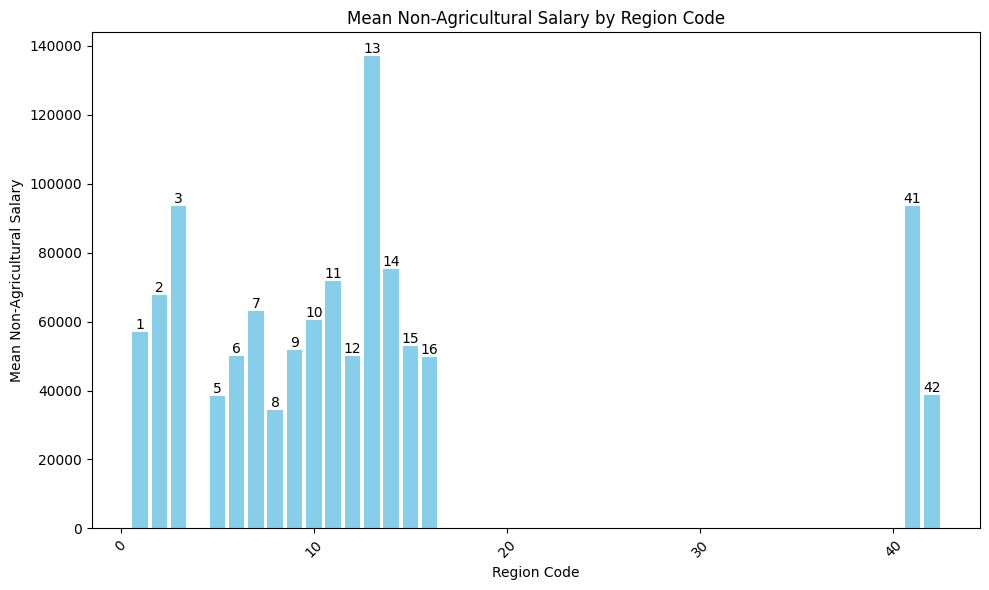

In [53]:
#Visualization
region_salaries = {
    1: 57000.0, 2: 67650.0, 3: 93500.0, 5: 38400.0, 6: 49934.0, 
    7: 63000.0, 8: 34300.0, 9: 51675.0, 10: 60404.0, 11: 71850.0, 
    12: 49870.0, 13: 137076.0, 14: 75400.0, 15: 52825.0, 16: 49800.0, 
    41: 93600.0, 42: 38780.0
}

grouped_regions = pd.DataFrame(list(region_salaries.items()), columns=["W_REGN", "NONAGRI_SAL"])

plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_regions["W_REGN"], grouped_regions["NONAGRI_SAL"], color='skyblue')

plt.xlabel('Region Code')
plt.ylabel('Mean Non-Agricultural Salary')
plt.title('Mean Non-Agricultural Salary by Region Code')

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, 
             f'{grouped_regions["W_REGN"][i]}', ha='center', va='bottom')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Q3: What occupation has the most employed in the dataset across all regions

In [54]:
occupation_counts = df['OCCUP'].value_counts()

top_10_occupations = occupation_counts.head(10)

print("Top 10 Occupations with the Most Employed Individuals:")
top_10_occupations

Top 10 Occupations with the Most Employed Individuals:


OCCUP
        7374
9211    3507
6111    3143
1314    1942
6112    1745
1316    1568
6121    1279
7123     972
6420     870
8322     753
Name: count, dtype: int64

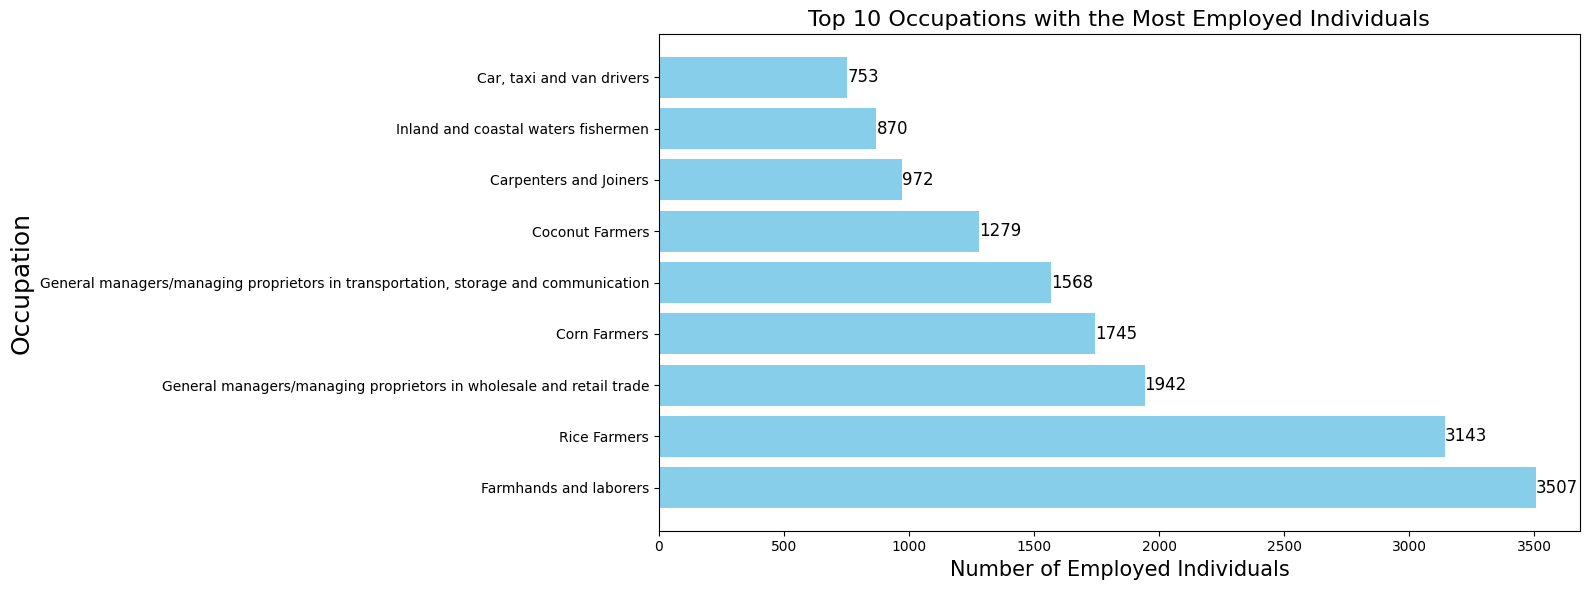

In [55]:
data = {
    'Occupation': [
        'Farmhands and laborers',
        'Rice Farmers',
        'General managers/managing proprietors in wholesale and retail trade',
        'Corn Farmers',
        'General managers/managing proprietors in transportation, storage and communication',
        'Coconut Farmers',
        'Carpenters and Joiners',
        'Inland and coastal waters fishermen',
        'Car, taxi and van drivers'
    ],
    'Count': [3507, 3143, 1942, 1745, 1568, 1279, 972, 870, 753]
}

occupation_df = pd.DataFrame(data)

#Sort the data descendingly
occupation_df.sort_values(by='Count', ascending=False, inplace=True)

plt.figure(figsize=(16, 6))

#Barplot
plt.barh(occupation_df['Occupation'], occupation_df['Count'], color='skyblue')

plt.title('Top 10 Occupations with the Most Employed Individuals', fontsize=16)
plt.xlabel('Number of Employed Individuals', fontsize=15)
plt.ylabel('Occupation', fontsize=18)

for index, value in enumerate(occupation_df['Count']):
    plt.text(value, index, f'{value}', va='center', fontsize=12)

plt.tight_layout()
plt.show()

### Q4: Is there a notable difference in the salary distribution by gender for sole earners in non-agricultural roles?
* H0: THe distribution of the two groups are equal (two groups have the same median)
* HA: THe distribution fo the two groups are not equal (two groups' median differ)

In [56]:
grouped_sex = clean_df.groupby(["SEX"])
aggregated_group_sex = grouped_sex.agg({"NONAGRI_SAL" : ["median", "count"]})
aggregated_group_sex

NONAGRI_SAL      
         median count
SEX                  
1       71400.0  8465
2       60000.0  1601

In [57]:
#Added group_sex_only to isolate the data that we needed for the question
sex_groups_only = clean_df.drop(columns=["W_REGN", "W_OID","W_SHSN","W_HCN","EMPLOYED_PAY", "OCCUP","JOB"])
male_group = sex_groups_only[sex_groups_only["SEX"] == 1]
female_group = sex_groups_only[sex_groups_only["SEX"] == 2]

Mann-Whitney U distribution used to find median ranks of two groups that assumes that there's no normality and variance are not equal. The male and female in this data is not normalized and there are outliers so we used this nonparametric statistical test.

In [58]:
u_test, p_value = mannwhitneyu(male_group["NONAGRI_SAL"],female_group["NONAGRI_SAL"])
print(u_test)
print(p_value)

6990333.0
0.04465055798250541


In [59]:
# Reject or Do Not Reject Null Hypothesis
alpha1 = 0.05
if (p_value < alpha1).all():
    print("Reject Null Hypothesis, There is significant difference between groups")
else:
    print("Fail to reject the null hypothesis, There is no significant difference between groups")

Reject Null Hypothesis, There is significant difference between groups


## Visualization

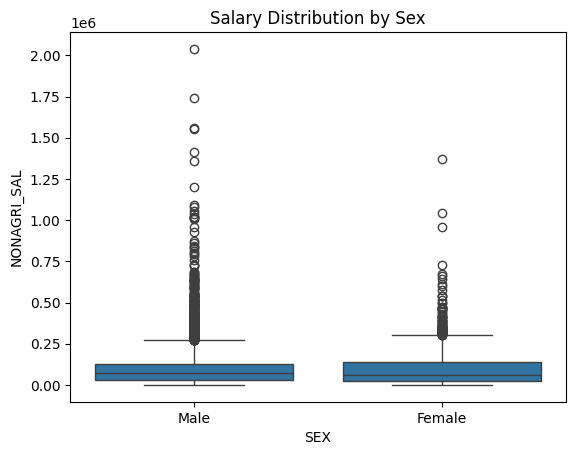

In [60]:
combined_salaries = pd.concat([male_group[['NONAGRI_SAL', 'SEX']], female_group[['NONAGRI_SAL', 'SEX']]])

sns.boxplot(x='SEX', y='NONAGRI_SAL', data=combined_salaries)

# Customize the plot
plt.title("Salary Distribution by Sex")
plt.xticks([0, 1], ['Male', 'Female'])  
plt.show()


# print(male_group.columns)
# print(female_group.columns)

We conclude that there is a significant difference in salary between male and females in non-agricultural sole earners. However, this difference may not be in the median salaries, but rather in the range of the salary distributions between two groups. The median may look close, but the test suggest that factors like the range of salaries, the outliers, and the overall shape of the distribution contribute to the difference

# __Research Question__
## How do salary distributions differ among clusters of sole earners based on their region and occupation, and what common traits exist within these clusters?
This research question will give insights Occupation Specific Trends by focusing on sole earners. This research can highlight how occupations are valued across all regions in the Philippines. It may reveal certain occupations that are consistent in getting a high-paying salary across all regions. It is important in finding this out so it can help people get a better knowledge on what jobs to reconsider.